## Data Preprocessing

In [1]:
import tensorflow_datasets as tfds
import torch
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [2]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

In [105]:
data_str = "synth"
data_size = 6399

batch_size = 32
latent_dim = 6
num_epochs = 20
beta = 2

In [4]:
data = tfds.load(data_str)["train"].take(data_size)

In [5]:
ecg_data = pd.DataFrame(data)['ecg'].map(lambda ecg: ecg['I'].numpy())
ecg_data = np.array(ecg_data.tolist()).reshape(len(data), 1, 500)

In [6]:
ecg_data.shape

(6399, 1, 500)

In [7]:
# Split the data into train and validation sets
train_data, val_data = train_test_split(ecg_data, test_size=0.2, random_state=42)

In [8]:
train_loader= DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader= DataLoader(val_data, batch_size=batch_size, shuffle=False)

## Model Configuration

In [106]:
from pythae.models import BetaTCVAEConfig, BetaTCVAE
from pythae.trainers import BaseTrainerConfig
from model import Encoder, Decoder

config = BaseTrainerConfig(
    output_dir='../results/my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_epochs=num_epochs,
)

model_config = BetaTCVAEConfig(
    input_dim=(1, 1, 500),
    latent_dim=latent_dim,
    beta=beta,
    alpha=1,
    gamma=1
)

model = BetaTCVAE(
    model_config=model_config,
    encoder=Encoder(model_config),
    decoder=Decoder(model_config)
)

In [107]:
model

BetaTCVAE(
  (decoder): Decoder(
    (linear): Linear(in_features=6, out_features=640, bias=True)
    (decode_1): Sequential(
      (0): ConvTranspose1d(128, 64, kernel_size=(5,), stride=(5,))
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (decode_2): Sequential(
      (0): ConvTranspose1d(64, 32, kernel_size=(5,), stride=(5,))
      (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (decode_3): Sequential(
      (0): ConvTranspose1d(32, 1, kernel_size=(4,), stride=(4,))
      (1): Sigmoid()
    )
  )
  (encoder): Encoder(
    (encode_1): Sequential(
      (0): Conv1d(1, 128, kernel_size=(4,), stride=(2,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (encode_2): Sequential(
      (0): Conv1d(128, 64, kernel_si

In [108]:
from pythae.pipelines import TrainingPipeline

pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [109]:
pipeline(
    train_data = train_data,
    eval_data= val_data
)

Preprocessing train data...
INFO:pythae.pipelines.training:Preprocessing train data...
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Preprocessing eval data...

INFO:pythae.pipelines.training:Preprocessing eval data...

Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created ../results/my_model\BetaTCVAE_training_2024-02-25_19-33-46. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created ../results/my_model\BetaTCVAE_training_2024-02-25_19-33-46. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 32
 - per_device_eval_batch_size: 32
 - checkpoint saving ever

Training of epoch 1/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 23.4158
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 23.4158
Eval loss: 13.3415
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 13.3415
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 10.9043
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 10.9043
Eval loss: 9.4171
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 9.4171
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 8.7433
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 8.7433
Eval loss: 7.9152
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 7.9152
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 7.7104
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 7.7104
Eval loss: 7.1454
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 7.1454
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 7.0437
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 7.0437
Eval loss: 6.6774
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 6.6774
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 6.6308
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 6.6308
Eval loss: 6.3311
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 6.3311
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 6.3804
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 6.3804
Eval loss: 6.1118
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 6.1118
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 6.2097
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 6.2097
Eval loss: 5.9597
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.9597
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 6.0952
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 6.0952
Eval loss: 5.8184
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.8184
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.9543
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.9543
Eval loss: 5.7463
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.7463
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.8948
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.8948
Eval loss: 5.6562
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.6562
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.8101
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.8101
Eval loss: 5.619
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.619
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.802
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.802
Eval loss: 5.5592
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.5592
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.7521
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.7521
Eval loss: 5.5665
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.5665
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.6861
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.6861
Eval loss: 5.543
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.543
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.6573
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.6573
Eval loss: 5.5251
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.5251
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.6779
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.6779
Eval loss: 5.4407
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.4407
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.6338
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.6338
Eval loss: 5.4333
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.4333
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.6081
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.6081
Eval loss: 5.4659
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.4659
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/160 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 5.6034
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 5.6034
Eval loss: 5.422
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 5.422
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in ../results/my_model\BetaTCVAE_training_2024-02-25_19-33-46\final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in ../results/my_model\BetaTCVAE_training_2024-02-25_19-33-46\final_model


## Visualize Reconstructions

In [110]:

embeddings = model.encoder.forward(torch.from_numpy(ecg_data.astype('float32')))['embedding']

In [111]:
reconstructions = model.decoder.forward(embeddings)['reconstruction'].detach().numpy()

In [112]:
from matplotlib import pyplot as plt

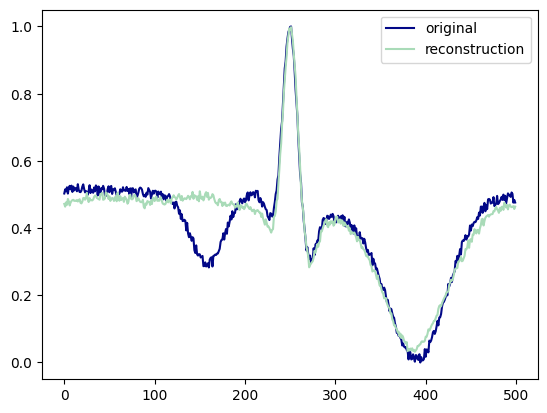

In [113]:
sample = 50
x_points = list(range(0, 500))
plt.plot(x_points, ecg_data[sample][0], color='#020887', label='original')
plt.plot(x_points, reconstructions[sample][0], color='#a9dbb8', label='reconstruction')
plt.legend()
plt.show()

In [114]:
from collections import namedtuple

meta_data = pd.DataFrame(data)[['t_height', 'p_height']].map(lambda d: d.numpy())
Data = namedtuple('Data', ['meta_data', 'z', 'discrete_features'])
input_data = Data(meta_data=meta_data, z=embeddings.detach().numpy(), discrete_features=[False]*len(meta_data.columns))

In [115]:
from interpretability_component.disentanglement_metrics import *
from interpretability_component.similarity_measures import *

sim_measure = SimilarityMeasure(input_data, mutual_information_regression)
dim_labels = sim_measure.get_interpreted_features(get_top_feature_for_meaningful_dims)
print(dim_labels)

dis_metric = DisentanglementMetric(sim_measure, mutual_information_gap)
dis_metric_score = dis_metric.compute_score()
print(dis_metric_score)

['no feature', 'no feature', 't_height', 'no feature', 'no feature', 'no feature']
0.27114544615369535


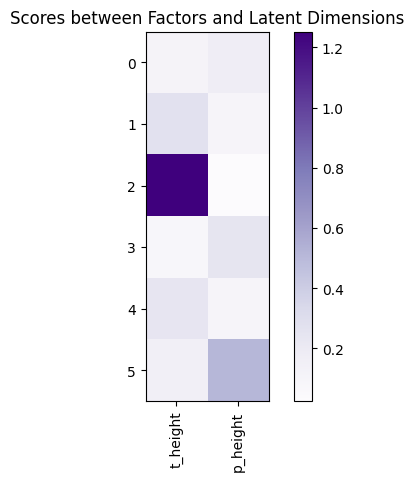

In [116]:
from interpretability_component.utils import *
visualize_mi_matrix(sim_measure.scores, meta_data.columns)